The goal of this project is to predict Earthquake damage using building characteristics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Importing Data
df = pd.read_csv("csv_building_structure.csv")
print("The shape of the dataframe is: ", df.shape)
df.head()

The shape of the dataframe is:  (762106, 31)


,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [3]:
df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

In [5]:
df.isnull().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

The data has only a few null values. Most of the null values are in the **damage_grade** column which is the target variable. So, we can just drop the rows having null values.

In [6]:
df.dropna(inplace = True)

In [7]:
df.isnull().sum()

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar

The columns ** count_floors_post_eq, height_ft_post_eq, condition_post_eq, technical_solution_proposed ** are variables measured after the earthquake. So, these columns will cause data leakage. In order to prevent that we will drop these columns.

In [8]:
df.drop(columns = ["count_floors_post_eq", "height_ft_post_eq", 
                   "condition_post_eq", "technical_solution_proposed"], inplace = True)

Let's have a look at values in the target column.

In [9]:
print("The number of unique values are: ", df["damage_grade"].nunique())

The number of unique values are:  5


In [10]:
print("The different damage_grade classes are: ", df["damage_grade"].unique())

The different damage_grade classes are:  ['Grade 3' 'Grade 5' 'Grade 2' 'Grade 1' 'Grade 4']


Currently, the dtype in this column is Object. We have to change it to a numerical variable. We can just retain the last character of the labels.

In [11]:
df["damage_grade"] = df["damage_grade"].str[-1].astype("int")

In [12]:
print("The different damage_grade classes are: ", df["damage_grade"].unique())

The different damage_grade classes are:  [3 5 2 1 4]


We are good to go.

In this project, we have no use of columns "district_id", "vdcmun_id" which refers to different municipalities and "ward_id". So, we will drop these columns as well.

In [13]:
df.drop(columns = ["district_id", "vdcmun_id", "ward_id"], inplace = True)

Each row is identified with a distinct "building_id". So, let's make this column the index of the dataframe.

In [14]:
df.set_index("building_id", inplace = True)

In [15]:
df.head()

,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
120101000011,1,9,288,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,...,0,0,0,0,0,1,0,0,0,3
120101000021,1,15,364,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,...,0,0,0,0,0,1,0,0,0,5
120101000031,1,20,384,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,...,0,0,0,0,0,0,0,0,0,2
120101000041,1,20,312,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,...,0,0,0,0,0,0,0,0,0,2
120101000051,1,30,308,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,...,0,0,0,0,0,0,0,0,0,1


Let's extract the numerical columns.

In [16]:
df_num = df[[column for column in df.columns if df[column].dtype == "int"]]
df_num.head()

,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
building_id,,,,,,,,,,,,,,,,
120101000011,1,9,288,9,0,1,0,0,0,0,0,1,0,0,0,3
120101000021,1,15,364,9,0,1,0,0,0,0,0,1,0,0,0,5
120101000031,1,20,384,9,0,1,0,0,0,0,0,0,0,0,0,2
120101000041,1,20,312,9,0,1,0,0,0,0,0,0,0,0,0,2
120101000051,1,30,308,9,0,1,0,0,0,0,0,0,0,0,0,1


### Visualisation

Now we will try to look at the relationship between different variables and the target variable.

Let's check if any variables are correlated or not with a correlation matrix and then with a heatmap.

In [17]:
df_num.corr()

,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
count_floors_pre_eq,1.000000,0.047125,0.102366,0.711189,0.035569,0.179642,-0.035185,-0.005380,0.032694,-0.152181,-0.078350,-0.085067,0.012108,0.059964,-0.045197,0.188363
age_building,0.047125,1.000000,-0.008477,0.036432,0.041384,0.044658,0.016227,-0.015838,0.021048,-0.041119,-0.014493,-0.035043,-0.032327,-0.023825,-0.011564,0.053863
plinth_area_sq_ft,0.102366,-0.008477,1.000000,0.203796,-0.003479,-0.238948,-0.002596,0.071878,0.038415,0.231981,-0.068539,-0.046654,0.207494,0.253335,-0.007112,-0.168073
height_ft_pre_eq,0.711189,0.036432,0.203796,1.000000,0.042477,0.034585,-0.022527,0.028492,0.033439,-0.031462,-0.070366,-0.080903,0.103014,0.146838,-0.036279,0.055052
has_superstructure_adobe_mud,0.035569,0.041384,-0.003479,0.042477,1.000000,-0.150662,0.017584,-0.000421,0.146298,-0.045669,0.038720,-0.009665,-0.032477,-0.024236,0.043216,0.005949
has_superstructure_mud_mortar_stone,0.179642,0.044658,-0.238948,0.034585,-0.150662,1.000000,-0.085205,-0.132182,-0.195151,-0.518044,-0.119340,-0.125863,-0.278698,-0.255671,-0.058518,0.480441
has_superstructure_stone_flag,-0.035185,0.016227,-0.002596,-0.022527,0.017584,-0.085205,1.000000,0.024892,-0.011355,-0.045984,0.109058,0.037044,-0.000807,-0.022436,0.029630,0.065972
has_superstructure_cement_mortar_stone,-0.005380,-0.015838,0.071878,0.028492,-0.000421,-0.132182,0.024892,1.000000,0.020310,0.088477,0.009415,-0.009784,0.085138,0.028953,0.005601,-0.066205
has_superstructure_mud_mortar_brick,0.032694,0.021048,0.038415,0.033439,0.146298,-0.195151,-0.011355,0.020310,1.000000,0.000930,0.001136,-0.021782,-0.003153,-0.008953,0.005590,-0.031637
has_superstructure_cement_mortar_brick,-0.152181,-0.041119,0.231981,-0.031462,-0.045669,-0.518044,-0.045984,0.088477,0.000930,1.000000,-0.058684,-0.048630,0.151883,0.125926,-0.006612,-0.349376


As expected, count_floors_pre_eq and height_ft_pre_eq have high correlation. So, we will discard the "height_ft_pre_eq" column as it has lower correlation with the target variable "damage_grade".

In [18]:
df_num.drop(columns = ["height_ft_pre_eq"], inplace = True)
df.drop(columns = ["height_ft_pre_eq"], inplace = True)

/home/nirmal/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


A few other columns look correlated but they seem to be independent. 

Let's make a heatmap to visualise the same.

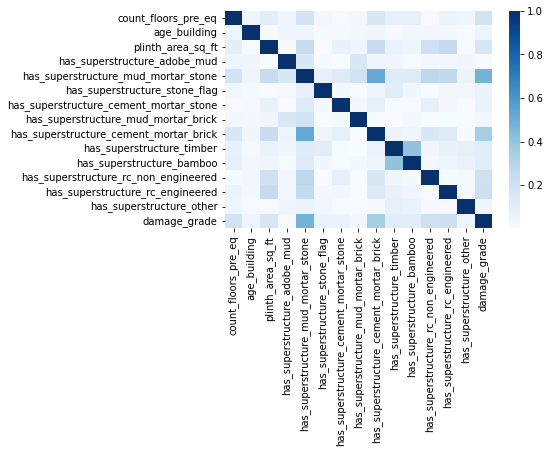

In [19]:
#Creating a heatmap
sns.heatmap(df_num.corr().apply(abs), cmap = "Blues");

Let's look at the distribution of different columns.

#### age_building

Text(0.5, 0, 'Damage Grade')

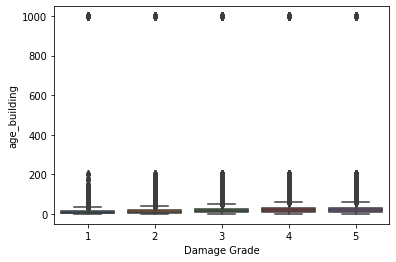

In [20]:
#Boxplots of building age for different damage grades
sns.boxplot(y = "age_building", x = "damage_grade", data = df_num)
plt.xlabel("Damage Grade")


Clearly, the column has many outliers. 

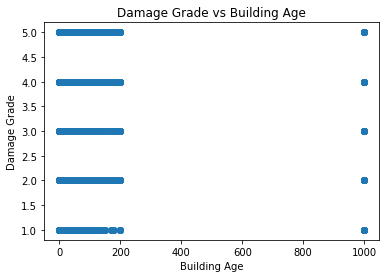

In [21]:
plt.scatter(x = df_num["age_building"], y = df_num["damage_grade"])
plt.xlabel("Building Age")
plt.ylabel("Damage Grade")
plt.title("Damage Grade vs Building Age");

The number of rows having building age greater than 200 is:

In [22]:
outliers = df_num.loc[df_num["age_building"] > 200].shape[0]
print("The number of rows having building age greater than 200 is: ", outliers)

The number of rows having building age greater than 200 is:  3144


We have to drop these rows as they are far away from other data points.

In [23]:
age_mask = df["age_building"] < 200
df_num = df_num[age_mask]

Text(0.5, 0, 'Damage Grade')

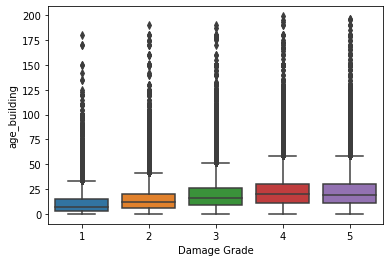

In [24]:
#Boxplots of building age for different damage grades
sns.boxplot(y = "age_building", x = "damage_grade", data = df_num)
plt.xlabel("Damage Grade")


It does look like that older buildings are damaged more.

We will generate many scatter plots in this project. So, let's create a function to do that.

In [25]:
#Function to make scatter plot of damage_grade vs any provided variable
def make_scatterplot(df, variable):
    
    plt.scatter(x = df_num[variable], y = df_num["damage_grade"])
    plt.xlabel(f"{variable}")
    plt.ylabel("Damage Grade")
    plt.title(f"Damage Grade vs {variable}");    

Let's analyze another column which is "count_floors_pre_eq".

**count_floors_pre_eq**

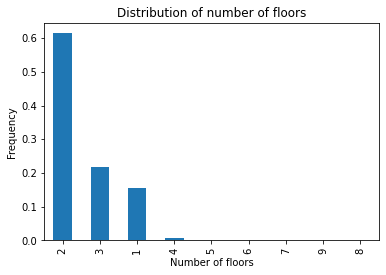

In [26]:
(df_num["count_floors_pre_eq"]
.value_counts(normalize = True)
.plot(kind = "bar"))
plt.xlabel("Number of floors")
plt.ylabel("Frequency")
plt.title("Distribution of number of floors");

Looks like most buildings have only 2 floors. Let's look at the actual value counts.

In [27]:
df_num["count_floors_pre_eq"].value_counts()

2    465849
3    166246
1    118538
4      6053
5      1562
6       329
7        88
9        13
8        12
Name: count_floors_pre_eq, dtype: int64

Let's create a scatter plot with damage grade.

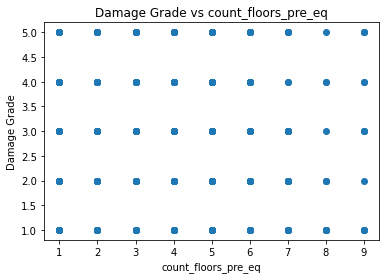

In [28]:
make_scatterplot(df_num, "count_floors_pre_eq")

It seems like there is no clear trend. It might be due to the fact that building having more floors are mostly concrete built and perhaps as stronger as a single floor bamboo house. For this project, let's drop all the buildings which have more than 5 floors. These buildings can be treated a high rise buildings and analysed separately.

In [29]:
floor_mask = df_num["count_floors_pre_eq"] < 5
df_num = df_num[floor_mask]


Moving on to the next column :

**plinth_area_sq_ft**

It seems that this is a continuous variable. So, let's visualise it's distribution using a histogram.

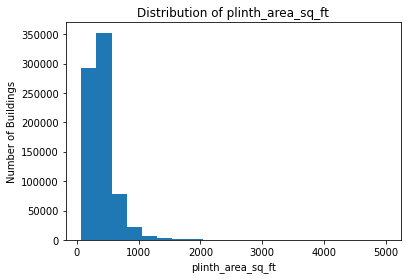

In [30]:
plt.hist(df_num["plinth_area_sq_ft"], bins = 20)
plt.xlabel("plinth_area_sq_ft")
plt.ylabel("Number of Buildings")
plt.title("Distribution of plinth_area_sq_ft");

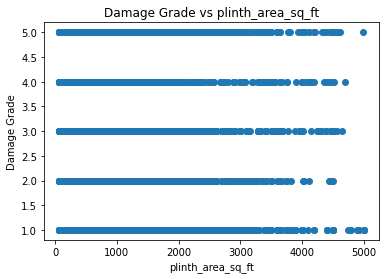

In [31]:
make_scatterplot(df_num, "plinth_area_sq_ft")

It seems like buildings having large plinth area suffered less.

All the remaining numerical variables are binary.

Let's aggregate the percentage of buildings having superstructure of muds using a pivot table. We will also create a columns for the percentage of buildings not having superstructure of muds and then we will use stacked bar plot to visualise.

In [32]:
adobe_mud = pd.pivot_table(
    df_num, index = "damage_grade", values = "has_superstructure_adobe_mud"
).sort_values(by = "has_superstructure_adobe_mud")
adobe_mud["does_not_has_superstructure_adobe_mud"] = 1 - adobe_mud["has_superstructure_adobe_mud"]
adobe_mud

,has_superstructure_adobe_mud,does_not_has_superstructure_adobe_mud
damage_grade,,
1,0.018342,0.981658
5,0.033893,0.966107
2,0.040571,0.959429
4,0.053238,0.946762
3,0.058178,0.941822


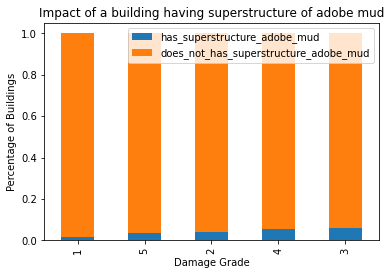

In [33]:
adobe_mud.plot(kind = "bar", stacked = True)
plt.xlabel("Damage Grade")
plt.ylabel("Percentage of Buildings")
plt.title("Impact of a building having superstructure of adobe mud");

In a similar manner we can visualise other binary columns.

Now let's have a look at the non-numerical columns.

In [35]:
num_cols = df_num.columns
df = df[[col for col in df.columns if col not in num_cols]]

In [36]:
df.columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration'],
      dtype='object')

#### Feature Engineering

Let's drop the numeric columns from the original dataframe and then merge the numerical dataframe with it using a right method because the numerical dataframe has less number of rows than the original dataframe as some rows were dropped.

In [37]:
print("The number of rows in the original dataframe is: ", df.shape[0])
print("The number of rows in the processed dataframe is: ", df_num.shape[0])

The number of rows in the original dataframe is:  762094
The number of rows in the processed dataframe is:  756686


In [38]:
num_cols = df_num.columns
df = df[[col for col in df.columns if col not in num_cols]]
df = pd.merge(df, df_num, on = "building_id", how = "right")
df.shape

(756686, 22)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756686 entries, 120101000011 to 366709001281
Data columns (total 22 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   land_surface_condition                  756686 non-null  object
 1   foundation_type                         756686 non-null  object
 2   roof_type                               756686 non-null  object
 3   ground_floor_type                       756686 non-null  object
 4   other_floor_type                        756686 non-null  object
 5   position                                756686 non-null  object
 6   plan_configuration                      756686 non-null  object
 7   count_floors_pre_eq                     756686 non-null  int64 
 8   age_building                            756686 non-null  int64 
 9   plinth_area_sq_ft                       756686 non-null  int64 
 10  has_superstructure_adobe_mud           

Some variables are categorical variables and these are identified by their datatype which is Object. Let's look at the number of categories in these column.

In [40]:
#Printing the number of unique values in categorical columns
for col in df.columns:
    if col not in df_num.columns:
        print(f"The number of categories in the {col} column is: ", df[col].nunique())

The number of categories in the land_surface_condition column is:  3
The number of categories in the foundation_type column is:  5
The number of categories in the roof_type column is:  3
The number of categories in the ground_floor_type column is:  5
The number of categories in the other_floor_type column is:  4
The number of categories in the position column is:  4
The number of categories in the plan_configuration column is:  10


So, the total number of categories is not too high. We can use all these categories.
We will use onehotencoder for these variables.

Let's extract the target variable in "y" and the remaining columns in "X".

In [41]:
y = df.pop("damage_grade")
X = df

Let's use pandas get_dummies method to encode the categorical columns.

Now, we have to split the data into train, validation and test sets. 

In [42]:
X_cat = [col for col in X.columns if X[col].dtype == "O"]
X_cat_df = X[X_cat]
X.drop(columns = X_cat, inplace = True)
X_cat_df = pd.get_dummies(X_cat_df)
X = pd.concat([X, X_cat_df], axis = "columns")

In [45]:
X.to_csv("complete_x.csv")
y.to_csv("complete_y.csv")

In [46]:
X.shape

(756686, 48)

In [47]:
y.shape

(756686,)

The value counts of the different categories in the target variable is:

In [ ]:
y.value_counts()

Clearly, the proportion of different labels are quiet different. So, we will use stratified splitting.

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify= y, test_size= 0.2,
                                                   random_state= 7)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, 
                                                      y_train, stratify= y_train, 
                                                      test_size= 0.2,
                                                     random_state= 7)

In [137]:
X_train.to_csv("X_train.csv")
X_valid.to_csv("X_valid.csv")
X_test.to_csv("X_test.csv")
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")
y_valid.to_csv("y_valid.csv")
